<a href="https://colab.research.google.com/github/kashish2610/Market_Campagian_Boosting_algo/blob/main/Market_campign_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE  # for handling class imbalance

# Feature Engg

In [2]:
df = pd.read_csv("/content/superstore_data.csv")
df.head(5)

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df.drop(['Id', 'Dt_Customer'], axis=1, inplace=True)

In [5]:
from datetime import datetime

current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth']

In [6]:
df.head(5)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
0,1970,Graduation,Divorced,84835.0,0,0,0,189,104,379,...,189,218,1,4,4,6,1,1,0,55
1,1961,Graduation,Single,57091.0,0,0,0,464,5,64,...,0,37,1,7,3,7,5,1,0,64
2,1958,Graduation,Married,67267.0,0,1,0,134,11,59,...,2,30,1,3,2,5,2,0,0,67
3,1967,Graduation,Together,32474.0,1,1,0,10,0,1,...,0,0,1,1,0,2,7,0,0,58
4,1989,Graduation,Single,21474.0,1,0,0,6,16,24,...,0,34,2,3,1,2,7,1,0,36


In [7]:
df.drop( 'Year_Birth', axis=1, inplace=True)


In [8]:
df.isnull().mean()

,0
Education,0.000000
Marital_Status,0.000000
Income,0.010714
Kidhome,0.000000
Teenhome,0.000000
Recency,0.000000
MntWines,0.000000
MntFruits,0.000000
MntMeatProducts,0.000000
MntFishProducts,0.000000


In [9]:
#handling missing data
df = df.dropna()

In [10]:
#reducing features
df['Family_Size'] = df['Kidhome'] + df['Teenhome']
df.drop(['Kidhome', 'Teenhome'], axis=1, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Marital_Status       2216 non-null   object 
 2   Income               2216 non-null   float64
 3   Recency              2216 non-null   int64  
 4   MntWines             2216 non-null   int64  
 5   MntFruits            2216 non-null   int64  
 6   MntMeatProducts      2216 non-null   int64  
 7   MntFishProducts      2216 non-null   int64  
 8   MntSweetProducts     2216 non-null   int64  
 9   MntGoldProds         2216 non-null   int64  
 10  NumDealsPurchases    2216 non-null   int64  
 11  NumWebPurchases      2216 non-null   int64  
 12  NumCatalogPurchases  2216 non-null   int64  
 13  NumStorePurchases    2216 non-null   int64  
 14  NumWebVisitsMonth    2216 non-null   int64  
 15  Response             2216 non-null   int64 

In [12]:
df.shape

(2216, 19)

## Performing **EDA**

### Bar chart

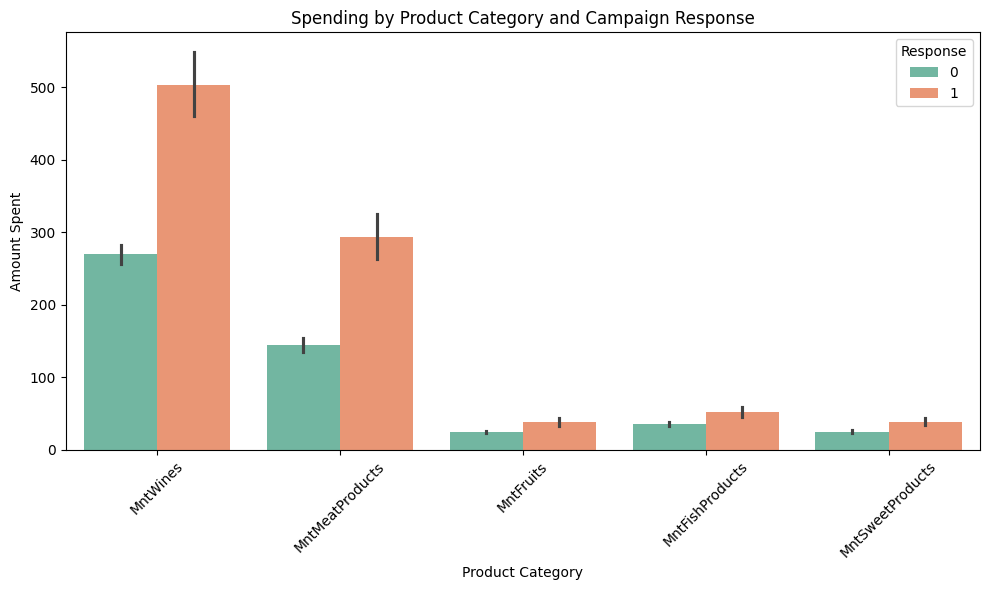

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Melt spending columns into long format
spending_cols = ['MntWines', 'MntMeatProducts', 'MntFruits', 'MntFishProducts', 'MntSweetProducts']
df_melted = df.melt(id_vars='Response', value_vars=spending_cols,
                    var_name='Product', value_name='Spending')

# Plot grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Product', y='Spending', hue='Response', data=df_melted, palette='Set2')
plt.title('Spending by Product Category and Campaign Response')
plt.ylabel('Amount Spent')
plt.xlabel('Product Category')
plt.legend(title='Response')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
# reducing features
df['Non_veg'] = df['MntMeatProducts'] + df['MntFishProducts']
df['Fruit_Sweet'] = df['MntSweetProducts'] + df['MntFruits']
df.drop(['MntMeatProducts', 'MntFishProducts'], axis=1, inplace=True)

In [15]:
df.drop(['MntSweetProducts', 'MntFruits'], axis=1, inplace=True)

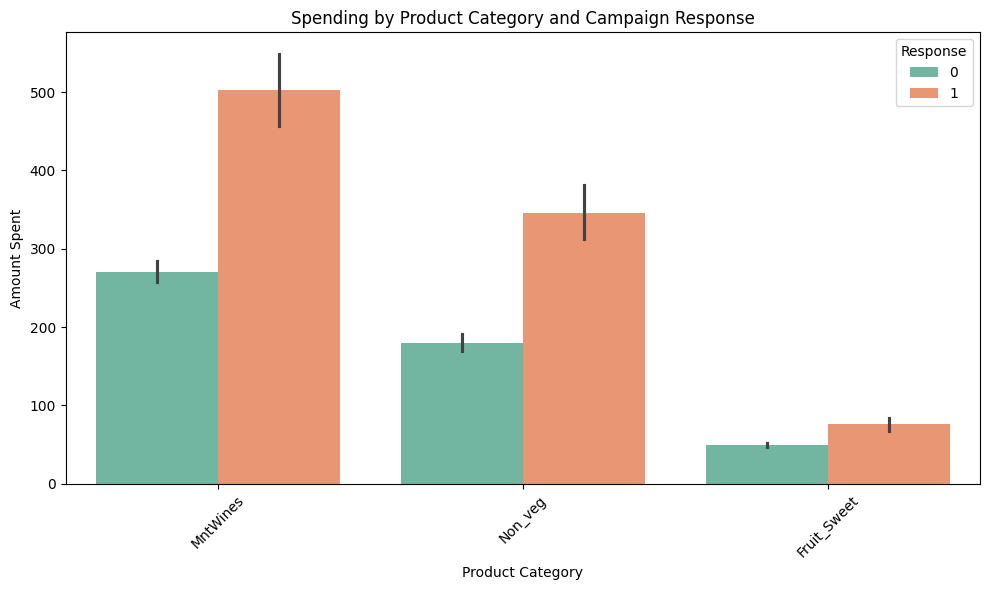

In [16]:
spending_cols = ['MntWines', 'Non_veg','Fruit_Sweet']
df_melted = df.melt(id_vars='Response', value_vars=spending_cols,
                    var_name='Product', value_name='Spending')

# Plot grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Product', y='Spending', hue='Response', data=df_melted, palette='Set2')
plt.title('Spending by Product Category and Campaign Response')
plt.ylabel('Amount Spent')
plt.xlabel('Product Category')
plt.legend(title='Response')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Marital_Status       2216 non-null   object 
 2   Income               2216 non-null   float64
 3   Recency              2216 non-null   int64  
 4   MntWines             2216 non-null   int64  
 5   MntGoldProds         2216 non-null   int64  
 6   NumDealsPurchases    2216 non-null   int64  
 7   NumWebPurchases      2216 non-null   int64  
 8   NumCatalogPurchases  2216 non-null   int64  
 9   NumStorePurchases    2216 non-null   int64  
 10  NumWebVisitsMonth    2216 non-null   int64  
 11  Response             2216 non-null   int64  
 12  Complain             2216 non-null   int64  
 13  Age                  2216 non-null   int64  
 14  Family_Size          2216 non-null   int64  
 15  Non_veg              2216 non-null   int64 

### Box plot


In [18]:
# outliers detctions
df['Income'].describe()

,Income
count,2216.000000
mean,52247.251354
std,25173.076661
min,1730.000000
25%,35303.000000
50%,51381.500000
75%,68522.000000
max,666666.000000


<Axes: xlabel='Income'>

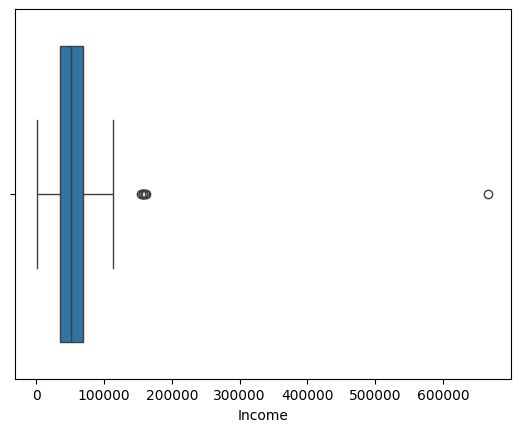

In [19]:
sns.boxplot(x=df['Income'])


In [20]:
df_fi = df[df['Income'] > 200000]
df_fi.head()

,Education,Marital_Status,Income,Recency,MntWines,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Family_Size,Non_veg,Fruit_Sweet
527,Graduation,Together,666666.0,23,9,12,4,3,1,3,6,0,0,48,1,26,15


In [21]:
# REMOVE OUTLIER
df = df.drop(index= 527)

In [22]:
#we will going to divide the income section into three part which is the small , medium and high earning individuals which can provide us more information on the subscroption part.

# 25% 35284.000000 50% 51373.000000 75% 68487.000000
percentiles = df['Income'].quantile([0.25,0.50,0.75])
percentiles


,Income
0.25,35284.0
0.50,51373.0
0.75,68487.0


In [23]:
# Function for dividing the income
def income_cat(x):
    if x < percentiles[0.25]:
        return 'low wage earner'
    elif x < percentiles[0.50]:
        return 'medium wage earner'
    else:
        return 'high wage earner'


In [24]:
df['wage_earner'] = df['Income'].apply(income_cat)

In [25]:
df.head()

,Education,Marital_Status,Income,Recency,MntWines,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Family_Size,Non_veg,Fruit_Sweet,wage_earner
0,Graduation,Divorced,84835.0,0,189,218,1,4,4,6,1,1,0,55,0,490,293,high wage earner
1,Graduation,Single,57091.0,0,464,37,1,7,3,7,5,1,0,64,0,71,5,high wage earner
2,Graduation,Married,67267.0,0,134,30,1,3,2,5,2,0,0,67,1,74,13,high wage earner
3,Graduation,Together,32474.0,0,10,0,1,1,0,2,7,0,0,58,2,1,0,low wage earner
4,Graduation,Single,21474.0,0,6,34,2,3,1,2,7,1,0,36,1,35,16,low wage earner


### Capture behavior and **relationships**

In [26]:
# total_spent: sum of Mnt*
df['total_spent'] = df['MntWines'] + df['Non_veg'] + df['Fruit_Sweet'] + df['MntGoldProds']

In [27]:
# Online Engagement: Sum of web purchases and visits
df['Online_Engagement'] = df['NumWebPurchases'] + df['NumWebVisitsMonth']

# Offline Engagement: Sum of store and catalog purchases
df['Offline_Engagement'] = df['NumStorePurchases'] + df['NumCatalogPurchases']

# Discount Rate: Deals per store purchase (with smoothing to avoid division by zero)
df['Discount_Rate'] = df['NumDealsPurchases'] / (df['NumStorePurchases'] + 1)


In [28]:
df.drop(  ['NumStorePurchases', 'NumCatalogPurchases', 'NumDealsPurchases','NumWebPurchases','NumWebVisitsMonth'], axis=1, inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2215 entries, 0 to 2239
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Education           2215 non-null   object 
 1   Marital_Status      2215 non-null   object 
 2   Income              2215 non-null   float64
 3   Recency             2215 non-null   int64  
 4   MntWines            2215 non-null   int64  
 5   MntGoldProds        2215 non-null   int64  
 6   Response            2215 non-null   int64  
 7   Complain            2215 non-null   int64  
 8   Age                 2215 non-null   int64  
 9   Family_Size         2215 non-null   int64  
 10  Non_veg             2215 non-null   int64  
 11  Fruit_Sweet         2215 non-null   int64  
 12  wage_earner         2215 non-null   object 
 13  total_spent         2215 non-null   int64  
 14  Online_Engagement   2215 non-null   int64  
 15  Offline_Engagement  2215 non-null   int64  
 16  Discount_Ra

### Binning and Seg


In [30]:
# Age Bins: Youth, Adult, Senior
df['Age']=pd.cut(df['Age'], bins=[0, 30, 60, 100], labels=['Youth', 'Adult', 'Senior'])

In [31]:
df.sample(5)

,Education,Marital_Status,Income,Recency,MntWines,MntGoldProds,Response,Complain,Age,Family_Size,Non_veg,Fruit_Sweet,wage_earner,total_spent,Online_Engagement,Offline_Engagement,Discount_Rate
782,Master,Divorced,10979.0,34,8,4,0,0,Adult,0,12,6,low wage earner,30,8,3,0.50
704,Graduation,Widow,40590.0,30,154,37,0,0,Adult,2,56,11,medium wage earner,258,9,7,1.25
1440,PhD,Married,36778.0,63,29,4,0,0,Adult,2,36,8,medium wage earner,77,12,3,0.75
1503,Graduation,Married,70951.0,66,239,54,0,0,Adult,0,808,97,high wage earner,1198,4,13,0.10
1953,Basic,Single,14906.0,86,7,15,0,0,Adult,0,21,23,low wage earner,66,9,4,0.75


## Encoding

In [32]:
df.sample(5)

,Education,Marital_Status,Income,Recency,MntWines,MntGoldProds,Response,Complain,Age,Family_Size,Non_veg,Fruit_Sweet,wage_earner,total_spent,Online_Engagement,Offline_Engagement,Discount_Rate
2055,Graduation,Together,76653.0,91,736,126,0,0,Adult,0,1165,252,high wage earner,2279,6,18,0.083333
44,2n Cycle,Divorced,25959.0,1,4,26,1,0,Adult,2,19,7,low wage earner,56,7,4,0.666667
432,Graduation,Married,79410.0,19,658,13,0,0,Senior,0,606,93,high wage earner,1370,4,7,0.166667
233,PhD,Together,32583.0,10,5,1,0,0,Senior,2,3,0,low wage earner,9,8,2,0.333333
2062,Graduation,Married,39722.0,92,32,8,0,0,Senior,1,7,0,medium wage earner,47,7,3,0.500000


In [33]:
df_encoded = pd.get_dummies(df, dtype= int, drop_first=False)

In [34]:
df_encoded.drop('Income', axis=1, inplace=True)

In [35]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2215 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Recency                         2215 non-null   int64  
 1   MntWines                        2215 non-null   int64  
 2   MntGoldProds                    2215 non-null   int64  
 3   Response                        2215 non-null   int64  
 4   Complain                        2215 non-null   int64  
 5   Family_Size                     2215 non-null   int64  
 6   Non_veg                         2215 non-null   int64  
 7   Fruit_Sweet                     2215 non-null   int64  
 8   total_spent                     2215 non-null   int64  
 9   Online_Engagement               2215 non-null   int64  
 10  Offline_Engagement              2215 non-null   int64  
 11  Discount_Rate                   2215 non-null   float64
 12  Education_2n Cycle              2215 no

In [36]:
df_encoded.sample(5)


,Recency,MntWines,MntGoldProds,Response,Complain,Family_Size,Non_veg,Fruit_Sweet,total_spent,Online_Engagement,...,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Age_Youth,Age_Adult,Age_Senior,wage_earner_high wage earner,wage_earner_low wage earner,wage_earner_medium wage earner
1145,51,70,4,0,0,2,16,0,90,8,...,0,0,0,0,0,0,1,1,0,0
1730,77,3,31,0,0,0,58,10,102,7,...,0,0,1,0,0,0,1,0,1,0
1440,63,29,4,0,0,2,36,8,77,12,...,0,0,0,0,0,1,0,0,0,1
964,42,594,32,0,0,0,703,106,1435,6,...,1,0,0,0,1,0,0,1,0,0
818,35,595,41,0,0,1,273,183,1092,12,...,0,0,1,0,0,1,0,0,0,1


In [37]:
# full correlation table
df_encoded.corr().style.background_gradient(cmap='viridis')

,Recency,MntWines,MntGoldProds,Response,Complain,Family_Size,Non_veg,Fruit_Sweet,total_spent,Online_Engagement,Offline_Engagement,Discount_Rate,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Age_Youth,Age_Adult,Age_Senior,wage_earner_high wage earner,wage_earner_low wage earner,wage_earner_medium wage earner
Recency,1.000000,0.015370,0.017417,-0.199981,0.013599,0.018322,0.019297,0.010928,0.019706,-0.017012,0.012496,0.014046,-0.005599,-0.003167,0.030599,-0.026190,-0.008464,0.004129,-0.023782,0.005468,-0.019597,0.003146,0.020638,-0.001444,-0.047804,0.005511,-0.019646,0.018698,0.003743,-0.017847,0.013533
MntWines,0.015370,1.000000,0.392588,0.246185,-0.039516,-0.353782,0.575261,0.438366,0.893098,0.206681,0.731398,-0.155759,-0.097503,-0.139665,-0.059500,0.036554,0.159279,0.004481,-0.013164,0.019897,-0.012648,-0.021409,0.006475,0.034599,0.001495,-0.016994,-0.159015,0.161874,0.687708,-0.485751,-0.308411
MntGoldProds,0.017417,0.392588,1.000000,0.140232,-0.031163,-0.268922,0.400533,0.424806,0.528599,0.144416,0.475372,-0.089857,0.017636,-0.064518,0.130947,-0.032498,-0.117679,0.092849,-0.012069,0.015244,-0.017383,-0.006760,-0.008250,0.043205,-0.001149,-0.015348,-0.076612,0.076469,0.416613,-0.302406,-0.178692
Response,-0.199981,0.246185,0.140232,1.000000,-0.002048,-0.167642,0.228122,0.134440,0.264015,0.114887,0.141298,-0.008902,-0.035558,-0.050113,-0.039482,0.003835,0.087888,0.029411,0.018856,0.054128,-0.079987,0.108639,-0.075023,0.045622,0.029411,0.021327,0.009422,-0.010767,0.099602,-0.073758,-0.041260
Complain,0.013599,-0.039516,-0.031163,-0.002048,1.000000,0.031777,-0.025056,-0.015952,-0.037475,0.000660,-0.021597,0.002997,0.034198,-0.015465,0.031950,-0.018341,-0.040228,-0.002941,-0.003603,-0.003036,-0.001196,0.017472,-0.004503,-0.018441,-0.002941,0.077495,-0.044705,0.026210,-0.032656,-0.002715,0.040441
Family_Size,0.018322,-0.353782,-0.268922,-0.167642,0.031777,1.000000,-0.526193,-0.442890,-0.500308,0.168580,-0.436268,0.214433,-0.026152,-0.047473,-0.019412,0.026449,0.035678,-0.038014,0.035373,0.026088,0.018894,-0.062044,0.025083,-0.016508,0.002120,-0.071197,0.010963,-0.001545,-0.324829,0.072734,0.302472
Non_veg,0.019297,0.575261,0.400533,0.228122,-0.025056,-0.526193,1.000000,0.667622,0.866290,-0.128596,0.717633,-0.056236,-0.026210,-0.107316,0.074757,-0.017627,-0.016433,0.036284,-0.024221,-0.025649,-0.025559,0.037856,0.002521,0.022166,-0.017456,0.014503,-0.068058,0.066264,0.609374,-0.385772,-0.317958
Fruit_Sweet,0.010928,0.438366,0.424806,0.134440,-0.015952,-0.442890,0.667622,1.000000,0.688183,-0.046781,0.612030,-0.171486,0.046952,-0.066555,0.123416,-0.069517,-0.094853,0.025833,-0.021785,0.004025,-0.011105,0.006750,-0.013212,0.042954,-0.019880,0.004060,-0.042019,0.040901,0.546562,-0.334703,-0.296497
total_spent,0.019706,0.893098,0.528599,0.264015,-0.037475,-0.500308,0.866290,0.688183,1.000000,0.067117,0.831884,-0.139481,-0.058742,-0.137815,0.024831,0.001802,0.060648,0.029184,-0.021423,0.001877,-0.020898,0.004544,0.002429,0.037725,-0.009143,-0.004100,-0.129859,0.130541,0.747985,-0.503694,-0.360092
Online_Engagement,-0.017012,0.206681,0.144416,0.114887,0.000660,0.168580,-0.128596,-0.046781,0.067117,1.000000,0.030630,0.144432,-0.015861,-0.028606,-0.001022,-0.020357,0.041281,-0.037135,0.019921,0.037690,0.008145,-0.039771,-0.003871,0.007830,0.047176,-0.028946,0.014659,-0.008313,0.008052,-0.063764,0.054501


## train test split

In [38]:
x=df_encoded.drop('Response',axis=1)
y=df_encoded['Response']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Smote


In [39]:
from imblearn.over_sampling import BorderlineSMOTE

# Borderline-SMOTE
bsmote = BorderlineSMOTE(random_state=42)
x_res_bsmote, y_res_bsmote = bsmote.fit_resample(X_train, y_train)




# Model Training

In [52]:
# Step 1: Define a function for model training and evaluation
def evaluate_model(model, X_train, X_test, y_train, y_test, threshold, verbose=True, sample_weight=None):
    # Train the model
    model.fit(X_train, y_train, sample_weight=sample_weight)
    thresholds = np.arange(0.3, 0.6, 0.05)
    # Predict probabilities and apply threshold
    y_prob = model.predict_proba(X_test)[:, 1]
    y_pred = (y_prob >= threshold).astype(int)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    if verbose:
        print(f" Threshold: {threshold}")
        print(" Accuracy:", round(accuracy, 4))
        print(" F1 Score:", round(f1, 4))
        print(" AUC Score:", round(auc, 4))
        print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
        print(" Classification Report:\n", classification_report(y_test, y_pred))

## Adaboost

In [41]:
# Step 1: Use GridSearchCV for hyperparameter tuning
grid=dict()
grid['n_estimators'] = [10,50,80,100]
grid['learning_rate'] = [0.0001,0.001,0.01,0.1,1.0]
grid_search = GridSearchCV(AdaBoostClassifier(), param_grid=grid, scoring='accuracy', n_jobs=-1, cv=10)
grid_result = grid_search.fit(x_res_bsmote,y_res_bsmote)

KeyboardInterrupt: 

In [ ]:
best_params = grid_result.best_params_
print("best %f using %s"% (grid_result.best_score_, grid_result.best_params_))

In [ ]:
# step 2: Model training
sample_weights = np.where(y_res_bsmote == 1, 5, 1)
abc = AdaBoostClassifier(learning_rate=best_params['learning_rate'], n_estimators=best_params['n_estimators'])


In [ ]:
thresholds = np.arange(0.3, 0.6, 0.05)
for t in thresholds:
    print(f"\nThreshold: {t}")
    evaluate_model(abc, x_res_bsmote, X_test, y_res_bsmote, y_test, threshold=t, verbose=True, shap_analysis=False)

In [ ]:
evaluate_model(abc, x_res_bsmote, X_test, y_res_bsmote, y_test, threshold=0.55, sample_weight=sample_weights)

##  Gradient Boosting

In [ ]:
# Step 1: Use RandomizedSearchCV for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats
param_dist = {
    'learning_rate': stats.uniform(0.01, 0.2),
    'n_estimators': stats.randint(50, 300),
    'max_depth': stats.randint(3, 6),
    'min_samples_split': stats.randint(2, 10),
    'min_samples_leaf': stats.randint(1, 5),
    'subsample': stats.uniform(0.6, 0.4)
}

random_search = RandomizedSearchCV(
   GradientBoostingClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=50,
    scoring='f1',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit on your resampled data
random_search.fit(x_res_bsmote, y_res_bsmote)

print("Best params found:", random_search.best_params_)
print("Best F1 score:", random_search.best_score_)

In [ ]:
sample_weights = np.where(y_res_bsmote == 1, 5, 1)
gbc = GradientBoostingClassifier(learning_rate=random_search.best_params_['learning_rate'], n_estimators=random_search.best_params_['n_estimators'],random_state=42)

In [ ]:
thresholds = np.arange(0.3, 0.6, 0.05)
for t in thresholds:
    print(f"\nThreshold: {t}")
    evaluate_model(gbc, x_res_bsmote, X_test, y_res_bsmote, y_test, threshold=t, verbose=True, shap_analysis=False)


In [ ]:
evaluate_model(gbc, x_res_bsmote, X_test, y_res_bsmote, y_test, threshold=.5)

## XGboost

In [42]:
pip install --upgrade xgboost


In [41]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score


### Optuna

In [40]:
pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 12.9 MB/s eta 0:00:00


In [ ]:
scale_pos_weight = len(y_res_bsmote[y_res_bsmote == 0]) / len(y_res_bsmote[y_res_bsmote == 1])

In [47]:
import optuna
import xgboost as xgb
from sklearn.model_selection import cross_val_score, StratifiedKFold

def objective(trial):
    params = {
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 1),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 5.0),    # L1 regularization
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 5.0),  # L2 regularization
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "scale_pos_weight": trial.suggest_float("scale_pos_weight",1,10)
    }

    model = xgb.XGBClassifier(**params, use_label_encoder=False)
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    score = cross_val_score(model, x_res_bsmote, y_res_bsmote, cv=cv, scoring="roc_auc").mean()
    return score
# Print the best parameters
print("Best trial:")
trial = study.best_trial

print(f"  AUC Score: {trial.value}")
print("  Best Parameters:")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

Best trial:
  AUC Score: 0.9779614397286597
  Best Parameters:
    min_split_gain: 0.12272502965150685
    n_estimators: 823
    max_depth: 6
    learning_rate: 0.16372281090094015
    subsample: 0.953817673118644
    colsample_bytree: 0.6765197198687591
    reg_alpha: 0.24415585817921792
    reg_lambda: 3.5193388805448516
    min_child_samples: 8
    scale_pos_weight: 9.11769860398954


In [48]:
study = optuna.create_study(direction="maximize")  # For metrics like ROC-AUC or F1
study.optimize(objective, n_trials=50)             # n_trials: number of parameter sets to try

print("Best hyperparameters:", study.best_params)
print("Best score:", study.best_value)

[I 2025-11-01 09:58:29,085] A new study created in memory with name: no-name-7821fde8-a36f-4b61-a5de-0e5fc4c44c9c
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:58:29] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:58:29] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:58:30] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-11-01 09:58:31,688] Trial 0 finished with value: 0.9736762828302146 and parameters: {'n_estimators': 555, 'max_depth': 10, 'learning_rate': 0.042857926032974364, 'subsample': 0.6462771642788528, 'colsamp

Best hyperparameters: {'n_estimators': 619, 'max_depth': 10, 'learning_rate': 0.05341992212918864, 'subsample': 0.8555225376626102, 'colsample_bytree': 0.8916847432070503, 'gamma': 0.5862089915785909, 'reg_alpha': 0.26642169537679816, 'reg_lambda': 0.9029237314047611, 'min_child_weight': 1, 'scale_pos_weight': 8.788135188128582}
Best score: 0.9784008934891362


In [67]:
best_params = study.best_params
xgb_model = xgb.XGBClassifier(**best_params, use_label_encoder=False, base_score=0.5)

In [70]:
thresholds = np.arange(0.5, 1, 0.05)
for t in thresholds:
    print(f"\nThreshold: {t}")
    evaluate_model(xgb_model, x_res_bsmote, X_test, y_res_bsmote, y_test, threshold=t, verbose=True)


Threshold: 0.5


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:23:05] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "min_child_samples", "min_split_gain", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


 Threshold: 0.5
 Accuracy: 0.8397
 F1 Score: 0.4965
 AUC Score: 0.8815
 Confusion Matrix:
 [[337  43]
 [ 28  35]]
 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.90       380
           1       0.45      0.56      0.50        63

    accuracy                           0.84       443
   macro avg       0.69      0.72      0.70       443
weighted avg       0.86      0.84      0.85       443


Threshold: 0.55


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:23:11] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "min_child_samples", "min_split_gain", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


 Threshold: 0.55
 Accuracy: 0.8488
 F1 Score: 0.5037
 AUC Score: 0.8815
 Confusion Matrix:
 [[342  38]
 [ 29  34]]
 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       380
           1       0.47      0.54      0.50        63

    accuracy                           0.85       443
   macro avg       0.70      0.72      0.71       443
weighted avg       0.86      0.85      0.85       443


Threshold: 0.6000000000000001


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:23:13] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "min_child_samples", "min_split_gain", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


 Threshold: 0.6000000000000001
 Accuracy: 0.8578
 F1 Score: 0.5116
 AUC Score: 0.8815
 Confusion Matrix:
 [[347  33]
 [ 30  33]]
 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.92       380
           1       0.50      0.52      0.51        63

    accuracy                           0.86       443
   macro avg       0.71      0.72      0.71       443
weighted avg       0.86      0.86      0.86       443


Threshold: 0.6500000000000001


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:23:14] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "min_child_samples", "min_split_gain", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


 Threshold: 0.6500000000000001
 Accuracy: 0.8668
 F1 Score: 0.528
 AUC Score: 0.8815
 Confusion Matrix:
 [[351  29]
 [ 30  33]]
 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       380
           1       0.53      0.52      0.53        63

    accuracy                           0.87       443
   macro avg       0.73      0.72      0.73       443
weighted avg       0.87      0.87      0.87       443


Threshold: 0.7000000000000002


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:23:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "min_child_samples", "min_split_gain", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


 Threshold: 0.7000000000000002
 Accuracy: 0.8691
 F1 Score: 0.5167
 AUC Score: 0.8815
 Confusion Matrix:
 [[354  26]
 [ 32  31]]
 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       380
           1       0.54      0.49      0.52        63

    accuracy                           0.87       443
   macro avg       0.73      0.71      0.72       443
weighted avg       0.86      0.87      0.87       443


Threshold: 0.7500000000000002


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:23:16] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "min_child_samples", "min_split_gain", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


 Threshold: 0.7500000000000002
 Accuracy: 0.8736
 F1 Score: 0.5
 AUC Score: 0.8815
 Confusion Matrix:
 [[359  21]
 [ 35  28]]
 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.93       380
           1       0.57      0.44      0.50        63

    accuracy                           0.87       443
   macro avg       0.74      0.69      0.71       443
weighted avg       0.86      0.87      0.87       443


Threshold: 0.8000000000000003


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:23:18] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "min_child_samples", "min_split_gain", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


 Threshold: 0.8000000000000003
 Accuracy: 0.8849
 F1 Score: 0.495
 AUC Score: 0.8815
 Confusion Matrix:
 [[367  13]
 [ 38  25]]
 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       380
           1       0.66      0.40      0.50        63

    accuracy                           0.88       443
   macro avg       0.78      0.68      0.72       443
weighted avg       0.87      0.88      0.87       443


Threshold: 0.8500000000000003


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:23:19] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "min_child_samples", "min_split_gain", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


 Threshold: 0.8500000000000003
 Accuracy: 0.8916
 F1 Score: 0.5
 AUC Score: 0.8815
 Confusion Matrix:
 [[371   9]
 [ 39  24]]
 Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       380
           1       0.73      0.38      0.50        63

    accuracy                           0.89       443
   macro avg       0.82      0.68      0.72       443
weighted avg       0.88      0.89      0.88       443


Threshold: 0.9000000000000004


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:23:21] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "min_child_samples", "min_split_gain", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


 Threshold: 0.9000000000000004
 Accuracy: 0.8894
 F1 Score: 0.4842
 AUC Score: 0.8815
 Confusion Matrix:
 [[371   9]
 [ 40  23]]
 Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       380
           1       0.72      0.37      0.48        63

    accuracy                           0.89       443
   macro avg       0.81      0.67      0.71       443
weighted avg       0.88      0.89      0.87       443


Threshold: 0.9500000000000004


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:23:23] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "min_child_samples", "min_split_gain", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


 Threshold: 0.9500000000000004
 Accuracy: 0.8849
 F1 Score: 0.4138
 AUC Score: 0.8815
 Confusion Matrix:
 [[374   6]
 [ 45  18]]
 Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.94       380
           1       0.75      0.29      0.41        63

    accuracy                           0.88       443
   macro avg       0.82      0.63      0.67       443
weighted avg       0.87      0.88      0.86       443



In [71]:
evaluate_model(xgb_model, x_res_bsmote, X_test, y_res_bsmote, y_test, threshold=0.85)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:24:40] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "min_child_samples", "min_split_gain", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


 Threshold: 0.85
 Accuracy: 0.8916
 F1 Score: 0.5
 AUC Score: 0.8815
 Confusion Matrix:
 [[371   9]
 [ 39  24]]
 Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       380
           1       0.73      0.38      0.50        63

    accuracy                           0.89       443
   macro avg       0.82      0.68      0.72       443
weighted avg       0.88      0.89      0.88       443

